#### 1. Loading a structured dataset with housing price anbd features

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

CRIM - Crime rate  --- Imp
ZN  :- zinc in residential architecture --- Imp
DIS :- Design, Innovation, and Sustainability  --- 
INDUS  - Non-retails business area   --- Imp
NOX: Nitric oxides concentration    ---Imp
AGE :-  Age of house   ---Imp
RM :- Rooms    ---Imp
TAX :- tax     ---Imp
PTRATIOn :- People teacher ration    ---Imp
B  :- Are of house(may be)   ---Imp
LSTAT :- Related to House looks
MEDV :- Median House Price   --- (Target Variable)
RAD :- Research Artistic Design + architecture

In [7]:
# df_replaced = df.replace('NA', np.nan)
# df.sample(10)
df.tail(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6,391,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6,391,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6,391,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [8]:
# df_replaced.dropna(inplace=True, axis=0)

In [9]:
# numerical_df = df.select_dtypes(include=['float64', 'int64'])
# print(numerical_df)

In [10]:
# df['CRIM'].any()

In [11]:
# df_replaced.columns
# df['CRIM'].any()
# df['CRIM'].isnull()

In [12]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        if df[column].isnull().any():
            df[column] = df[column].fillna(df[column].mean())

In [13]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [14]:
# numerical_values = df.select_dtypes(include=['int64', 'float64']).columns
# scaler = StandardScaler()

# df_scaler = df.copy()
# df_scaler[numerical_values] = scaler.fit_transform(df[numerical_values])

In [15]:
# df_scaler.head()

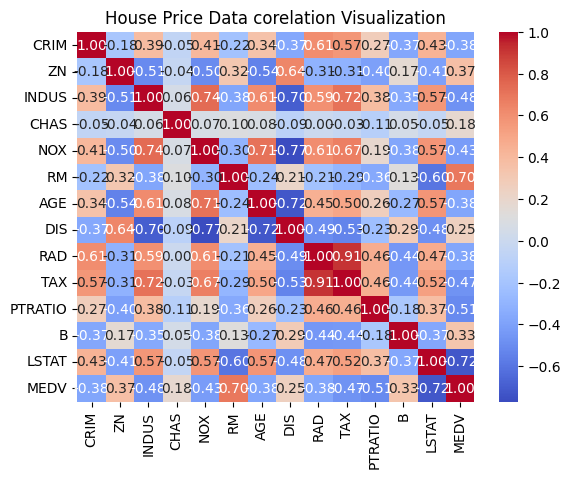

In [16]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f" )
plt.title('House Price Data corelation Visualization')
plt.show()

In [17]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [20]:
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_scale, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [21]:
y_pred = model.predict(X_test_scale)


In [22]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

In [23]:
print("Model Evaluation")
print(f"Root Mean Squared Error (RMSE) is :- {rmse:.2f}")
print(f"R2 Score is:- {r2:.2f}")

Model Evaluation
Root Mean Squared Error (RMSE) is :- 2.87
R2 Score is:- 0.89


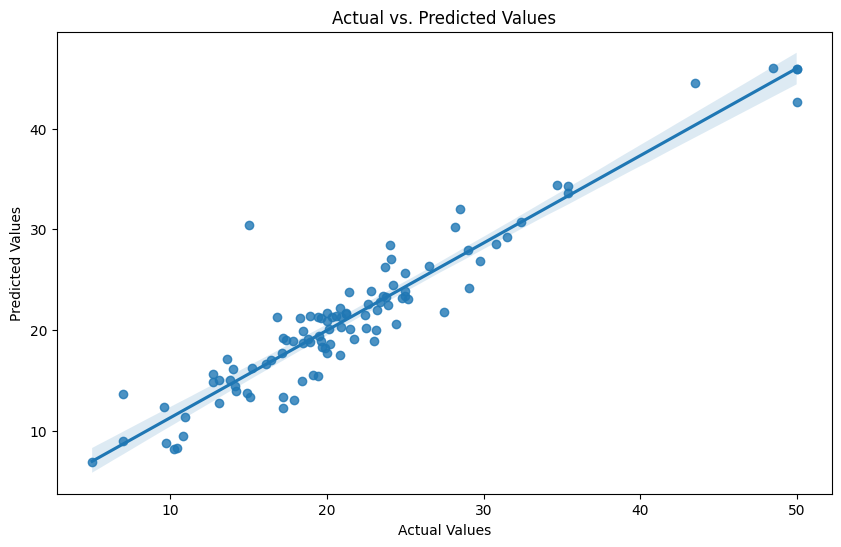

In [24]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [25]:

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print("List of important features are:- ")
print(feature_importances)

List of important features are:- 
CRIM       0.042415
ZN         0.002088
INDUS      0.007105
CHAS       0.001946
NOX        0.018138
RM         0.560699
AGE        0.012309
DIS        0.059761
RAD        0.004370
TAX        0.017477
PTRATIO    0.017243
B          0.013651
LSTAT      0.242797
dtype: float64


In [26]:
# y_pred = model.predict(X_test_scale)

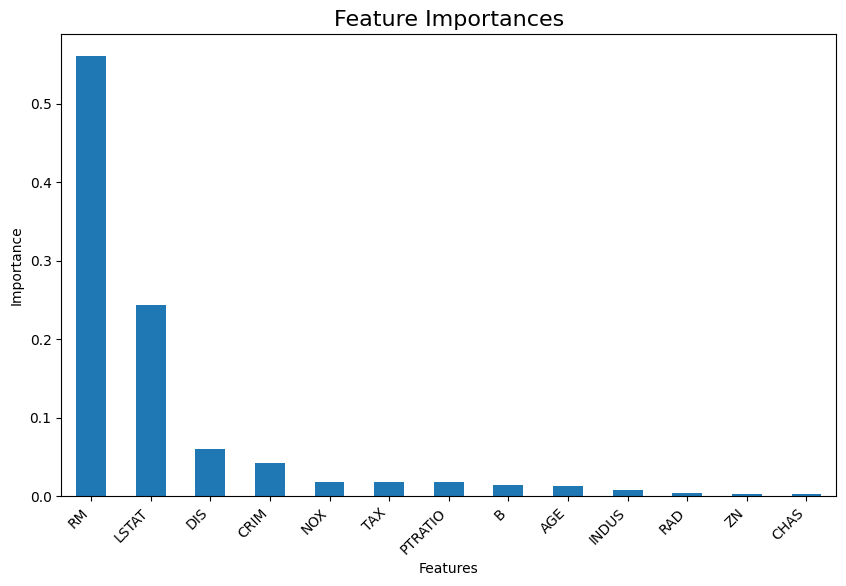

In [27]:
feature_importances_sorted = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6)) 
feature_importances_sorted.plot(kind='bar')

plt.title('Feature Importances', fontsize=16)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.show()

In [28]:
import pickle

with open('RFC_model.pkl', 'wb') as file:
    pickle.dump(model, file)


with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("File exported successfully.")

File exported successfully.
